In [ ]:
!pip install ktrain

In [2]:
# Importing the libraries.
import pandas as pd
import numpy as np
import ktrain
import tensorflow
from ktrain import text
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/tweets.csv')

In [6]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,With domestic output exceeding regional demand...,False,0,NaN,2019-07-05T12:52:01Z,True,NaN,1147125982907813888,NaN,"<a href=""https://www.oktopost.com"" rel=""nofoll...",ArgusMedia,0,False,False,NaN,NaN
1,"For Friday, here is US Crude Oil front 12 mont...",False,0,NaN,2019-07-05T12:50:03Z,True,NaN,1147125489103974400,NaN,"<a href=""https://twittimer.com"" rel=""nofollow""...",macrohedged,0,False,False,NaN,NaN
2,"RT @aeberman12: OPEC ""pumped 29.6 mmbpd last m...",False,0,NaN,2019-07-05T12:39:58Z,False,NaN,1147122950753181697,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",El_Spy,1,True,False,NaN,NaN
3,"RT @aeberman12: ""Ships vanishing from tracking...",False,0,NaN,2019-07-05T12:38:45Z,False,NaN,1147122646003437568,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SuperiorMar,1,True,False,NaN,NaN
4,"OPEC ""pumped 29.6 mmbpd last month, down 170 k...",False,4,NaN,2019-07-05T12:38:36Z,True,NaN,1147122604551155712,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",aeberman12,1,False,False,NaN,NaN


In [7]:
df.shape

(1000, 16)

In [24]:
df.isnull().sum()

text                0
favorited           0
favoriteCount       0
replyToSN         955
created             0
truncated           0
replyToSID        964
id                  0
replyToUID        955
statusSource        0
screenName          0
retweetCount        0
isRetweet           0
retweeted           0
longitude        1000
latitude         1000
dtype: int64

In [8]:
# splitting data into train and test part.
## train data length.
train_data_len = df.shape[0]*0.7

## here is our train data.
train_data = df.loc[:train_data_len-1]

## train data shape.
train_data.shape

(700, 16)

In [9]:
## getting the test data.
test_data = df.loc[train_data_len:]

## getting the shape for test data.
test_data.shape

(300, 16)

In [10]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=train_data,
                   text_column='text',
                   label_columns='truncated',
                   val_df=test_data,
                   maxlen=400,
                   preprocess_mode='bert',
                   )

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [11]:
X_train[0].shape

(700, 400)

In [12]:
X_train[0]

array([[  101,  2007,  4968, ...,     0,     0,     0],
       [  101,  2005,  5958, ...,     0,     0,     0],
       [  101, 19387,  1030, ...,     0,     0,     0],
       ...,
       [  101, 19387,  2762, ...,     0,     0,     0],
       [  101, 19387, 13066, ...,     0,     0,     0],
       [  101, 19387,  1037, ...,     0,     0,     0]])

In [13]:
model = text.text_classifier(
    name='bert',
    train_data=(X_train, y_train),
    preproc=preprocess,
)

Is Multi-Label? False
maxlen is 400
done.


In [15]:
# Get learning rate
learner = ktrain.get_learner(
    model=model,
    train_data=(X_train, y_train),
    val_data=(X_test, y_test),
    batch_size=6,
)

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
117/117 [==============================] - 3226s 28s/step - loss: 0.5641 - accuracy: 0.7243
Epoch 2/3
117/117 [==============================] - 3241s 28s/step - loss: 1.0312 - accuracy: 0.6429
Epoch 3/3
117/117 [==============================] - 3232s 28s/step - loss: 6.7004 - accuracy: 0.5000


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


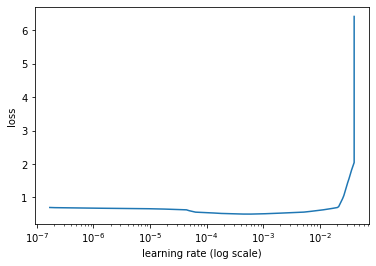

In [16]:
learner.lr_find(max_epochs=3)
learner.lr_plot()

In [17]:
learner.fit_onecycle(lr=1e-6, epochs=1)



begin training using onecycle policy with max lr of 1e-06...
117/117 [==============================] - 3685s 31s/step - loss: 0.6387 - accuracy: 0.6971 - val_loss: 0.6036 - val_accuracy: 0.8300


In [18]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

In [27]:
doc = list(df.text.head())
predictor.predict(doc)
# ------------------------------------------------
# truncated is label column in the dataset...
# truncated --> True
# not_truncated --> False
# ------------------------------------------------

['truncated', 'truncated', 'not_truncated', 'not_truncated', 'truncated']

In [28]:
predictor.save('content/bert')